# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.166870e+01     7.707520e+00
 * time: 0.004960060119628906
     1     2.956334e+01     5.340413e+00
 * time: 0.013887166976928711
     2     2.765304e+01     1.170799e+01
 * time: 0.0355992317199707
     3     1.485251e+01     3.197532e+00
 * time: 0.06232810020446777
     4     1.259072e+01     1.163766e+00
 * time: 0.0863950252532959
     5     1.109634e+01     1.628515e+00
 * time: 0.10824012756347656
     6     1.045951e+01     2.082695e+00
 * time: 0.12568020820617676
     7     9.648093e+00     1.027649e+00
 * time: 0.1429910659790039
     8     9.376569e+00     9.500840e-01
 * time: 0.16032719612121582
     9     9.210249e+00     5.359494e-01
 * time: 0.17760610580444336
    10     9.022147e+00     7.465496e-01
 * time: 0.19521808624267578
    11     8.880486e+00     5.182970e-01
 * time: 0.21251320838928223
    12     8.791854e+00     8.153358e-01
 * time: 0.22555804252624512
    13     8.708055e+00     6.002588e-01
 * time: 

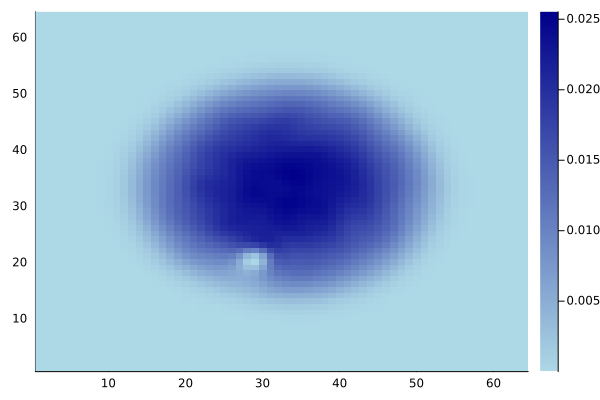

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)